# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [3]:
column_titles=df.columns
lowercase_titles=[]
for title in column_titles:
    lowercase_titles.append(title.lower())
for i in range(len(lowercase_titles)):
    df = df.rename(index=str, columns={column_titles[i]:lowercase_titles[i]})
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the Index to be the Line Names

In [4]:
#Your code here
linenames=list(df.linename)
df=df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Painstakingly change the index back

In [5]:
# Your code here
df["linename"]=linenames
numbers_for_index=list(range(len(df)))
df["index"]=numbers_for_index
df=df.set_index("index")
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits,linename
index,,,,,,,,,,,
0,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,NQR456W
1,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,NQR456W
2,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,NQR456W
3,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,NQR456W
4,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,NQR456W


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order

In [6]:
# Your code here
num_lines=[]
for i in range(len(df)):
    num_lines.append(len(df.linename[i]))
df["Num_Lines"]=num_lines
df.sort_values("Num_Lines")
df.tail(10)

,c/a,unit,scp,station,division,date,time,desc,entries,exits,linename,Num_Lines
index,,,,,,,,,,,,
197615,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/30/2018,09:00:00,REGULAR,5554,348,R,1
197616,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/30/2018,13:00:00,REGULAR,5554,348,R,1
197617,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/30/2018,17:00:00,REGULAR,5554,348,R,1
197618,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/30/2018,21:00:00,REGULAR,5554,348,R,1
197619,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,01:00:00,REGULAR,5554,348,R,1
197620,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,05:00:00,REGULAR,5554,348,R,1
197621,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,09:00:00,REGULAR,5554,348,R,1
197622,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,13:00:00,REGULAR,5554,348,R,1
197623,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,17:00:00,REGULAR,5554,348,R,1


## Write a function to clean a column name

In [7]:
def clean(col_name):
    return col_name.strip()

In [8]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [9]:
#Checking the output, we can see the results.
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'division', 'date', 'time', 'desc',
       'entries', 'exits', 'linename', 'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

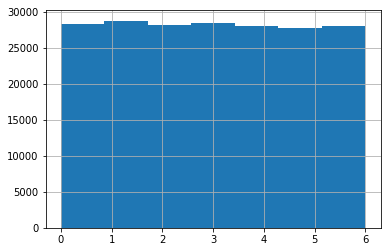

In [10]:
#Your code here
df['date']=pd.to_datetime(df['date'])
days=df['date'].dt.dayofweek
days.hist(bins=7)

{'Monday': 28254, 'Tuesday': 28772, 'Wednesday': 28203, 'Thursday': 28447, 'Friday': 28101, 'Saturday': 27767, 'Sunday': 28081}


<BarContainer object of 7 artists>

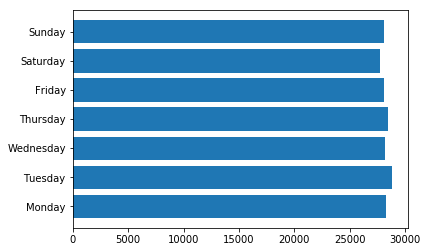

In [11]:
days_of_week_traffic={'Monday':0,'Tuesday':0,'Wednesday':0,'Thursday':0,'Friday':0,'Saturday':0,'Sunday':0}
for day in days:
    if day == 0:
        days_of_week_traffic['Monday']+=1
    elif day ==1:
        days_of_week_traffic['Tuesday']+=1
    elif day ==2:
        days_of_week_traffic['Wednesday']+=1
    elif day==3:
        days_of_week_traffic['Thursday']+=1
    elif day==4:
        days_of_week_traffic['Friday']+=1
    elif day==5:
        days_of_week_traffic['Saturday']+=1
    else:
        days_of_week_traffic['Sunday']+=1
print(days_of_week_traffic)


plt.barh(list(days_of_week_traffic.keys()),list(days_of_week_traffic.values()))

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes

In [12]:
#Your code here
traffic_all_week=list(days_of_week_traffic.values())

#avg per weekday
weekday_traffic=pd.Series(traffic_all_week[0:5])
mean_weekday_traffic=weekday_traffic.mean()

#avg per weekend day
weekend_traffic=pd.Series(traffic_all_week[5:7])
mean_weekend_traffic=weekend_traffic.mean()

print(f"There are an average of {round(mean_weekday_traffic)} turnstile entries on a weekday and {round(mean_weekend_traffic)} on a weekend day.")
if mean_weekday_traffic>mean_weekend_traffic:
    print("The average traffic is higher on a weekday.")
    print(f"The difference between the two is {round(mean_weekday_traffic-mean_weekend_traffic)} entries.")
elif mean_weekday_traffic>mean_weekend_traffic:
    print("The average traffic is higher on a weekend day.")
    print(f"The difference between the two is {round(mean_weekend_traffic-mean_weekday_traffic)} entries.")
else:
    print("Weekends and weekdays have the same amount of traffic on average.")

There are an average of 28355 turnstile entries on a weekday and 27924 on a weekend day.
The average traffic is higher on a weekday.
The difference between the two is 431 entries.


## Drop a couple of columns

In [13]:
# Your code here
df.drop(columns=['c/a','unit'])

,scp,station,division,date,time,desc,entries,exits,linename,Num_Lines
index,,,,,,,,,,
0,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,NQR456W,7
1,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,NQR456W,7
2,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,NQR456W,7
3,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,NQR456W,7
4,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,NQR456W,7
5,02-00-00,59 ST,BMT,2018-08-25,20:00:00,REGULAR,6736562,2283425,NQR456W,7
6,02-00-00,59 ST,BMT,2018-08-26,00:00:00,REGULAR,6736683,2283460,NQR456W,7
7,02-00-00,59 ST,BMT,2018-08-26,04:00:00,REGULAR,6736696,2283461,NQR456W,7
8,02-00-00,59 ST,BMT,2018-08-26,08:00:00,REGULAR,6736705,2283483,NQR456W,7


## Summary

Great! You practiced your data cleanup-skills using Pandas.